In [1]:
%pip install gymnasium gym matplotlib numpy pandas 

  Using cached gymnasium-1.2.0-py3-none-any.whl.metadata (9.9 kB)
  Using cached gym-0.26.2.tar.gz (721 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached matplotlib-3.10.5-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.3.2-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.3.1-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached typing_extensions-4.14.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
  Using cached gym_notices-0.1.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached contourpy-1.3.3-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-an

In [2]:
# imports
import gymnasium as gym
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [ ]:
# import the blackjack environment
name = 'Blackjack-v1'
env = gym.make(name) # warning: setting slippery=True results in very complex environment dynamics where the optimal solution does not make sense to humans!

In [5]:
def random_epsilon_greedy_policy(Q, epsilon, state, nA):
    A = np.ones(nA, dtype=float) * epsilon / nA
    best_action = np.argmax(Q[state])
    A[best_action] += (1.0 - epsilon)
    return A

## Simular un episodio

In [ ]:
def simular_episodio(env, politica=None, render=False):
    """
    Simula un episodio completo de Blackjack desde el inicio hasta un estado terminal.
    Args:
        env: entorno de Blackjack (Gymnasium)
        politica: función que recibe un estado y devuelve una acción (opcional)
        render: si es True, muestra el entorno en cada paso
    Returns:
        estados, acciones, recompensas: listas con la secuencia del episodio
    """
    estados = []
    acciones = []
    recompensas = []
    estado, _ = env.reset()
    terminado = False

    while not terminado:
        if render:
            env.render()
        if politica is not None:
            accion = politica(estado)
        else:
            accion = env.action_space.sample()
        nuevo_estado, recompensa, terminado, _, _ = env.step(accion)
        estados.append(estado)
        acciones.append(accion)
        recompensas.append(recompensa)
        estado = nuevo_estado

    return estados, acciones, recompensas
# estados, acciones, recompensas = simular_episodio(env)
# print("Estados:", estados)
# print("Acciones:", acciones)
# print("Recompensas:", recompensas)

Estados: [(6, 4, 0), (15, 4, 0), (16, 4, 0), (19, 4, 0)]
Acciones: [np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
Recompensas: [0.0, 0.0, 0.0, -1.0]


# Fully random approach

In [6]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
n_s_a = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes = 100000
epsilon = 1
stats = 0.0

for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    results_list = []
    result_sum = 0.0
    while not done:
        action = env.action_space.sample()
        new_state, reward, done, _, _ = env.step(action)
        results_list.append((state, action))
        result_sum += reward
        state = new_state
    
    for (state, action) in results_list:
        n_s_a[state, action] += 1.0
        alpha = 1.0 / n_s_a[state, action]
        Q[state, action] += alpha * (result_sum - Q[state, action])

    stats += result_sum
    if episode % 500 == 0 and episode is not 0:
        print(f"success: {stats/episode}, epsilon: {epsilon}")

print(f"success: {stats/episode}, epsilon: {epsilon}")

env.close()

<>:25: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
<>:25: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
/tmp/ipykernel_129888/3501126198.py:25: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
  if episode % 500 == 0 and episode is not 0:


success: 0.02, epsilon: 1
success: 0.015, epsilon: 1
success: 0.014, epsilon: 1
success: 0.0155, epsilon: 1
success: 0.0144, epsilon: 1
success: 0.014, epsilon: 1
success: 0.014857142857142857, epsilon: 1
success: 0.01425, epsilon: 1
success: 0.014, epsilon: 1
success: 0.0142, epsilon: 1
success: 0.013818181818181818, epsilon: 1
success: 0.013, epsilon: 1
success: 0.012615384615384615, epsilon: 1
success: 0.012857142857142857, epsilon: 1
success: 0.013466666666666667, epsilon: 1
success: 0.013625, epsilon: 1
success: 0.013647058823529411, epsilon: 1
success: 0.013666666666666667, epsilon: 1
success: 0.01431578947368421, epsilon: 1
success: 0.0147, epsilon: 1
success: 0.015047619047619048, epsilon: 1
success: 0.01509090909090909, epsilon: 1
success: 0.015304347826086957, epsilon: 1
success: 0.015, epsilon: 1
success: 0.01512, epsilon: 1
success: 0.014923076923076923, epsilon: 1
success: 0.014666666666666666, epsilon: 1
success: 0.014357142857142857, epsilon: 1
success: 0.014206896551724

# Epsilon-Greedy Exploration

In [7]:
# lets just sample the maximum action from Q to show the optimal policy
def pi_star_from_Q(Q):
    done = False
    pi_star = np.zeros([env.observation_space.n, env.action_space.n])
    state, _ = env.reset() # start in top-left, = 0
    while not done:
        action = np.argmax(Q[state, :])
        pi_star[state,action] = 1
        state, reward, done, _, _ = env.step(action)
    return pi_star

<>:28: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
<>:28: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
/tmp/ipykernel_129888/1839504525.py:28: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
  if episode % 50 == 0 and episode is not 0:


success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.0, epsilon: 0.3
success: 0.014782608695652174, epsilon: 0.3
success: 0.0375, epsilon: 0.3
success: 0.0584, epsilon: 0.3
success: 0.07615384615384616, epsilon: 0.3
success: 0.09185185185185185, epsilon: 0.3
success: 0.11285714285714285, epsilon: 0.3
success: 0.13241379310344828, epsilon: 0.3
success: 0.148, epsilon: 0.3
success: 0.16193548387096773, epsilon: 0.3
success: 0.174375, epsilon: 0.3
success: 0.188484848484848

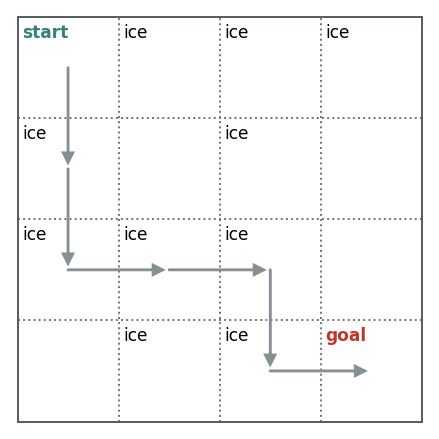

In [ ]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
n_s_a = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes = 5000
epsilon = .3
stats = 0.0

for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    results_list = []
    result_sum = 0.0
    while not done:
        if np.random.rand() > epsilon:
            action = np.argmax(Q[state, :])
        else:
            action = env.action_space.sample()
        new_state, reward, done, _, _ = env.step(action)
        results_list.append((state, action))
        result_sum += reward
        state = new_state
    
    for (state, action) in results_list:
        n_s_a[state, action] += 1.0
        alpha = 1.0 / n_s_a[state, action]
        Q[state, action] += alpha * (result_sum - Q[state, action])

    stats += result_sum
    if episode % 50 == 0 and episode is not 0:
        print(f"success: {stats/episode}, epsilon: {epsilon}")

print(f"success: {stats/episode}, epsilon: {epsilon}")

env.close()